In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-08-02 14:07:38--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-08-02 14:07:38 (4.97 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


Decoding

In [ ]:
col=['sex','smoker','region']
for k in col:
  dataset[k]=dataset[k].astype('category').cat.codes

splitting into test, train

In [ ]:
X = dataset.drop('expenses',axis=1)
Y=dataset['expenses']

In [ ]:
from sklearn.model_selection import train_test_split
train_dataset,test_dataset,train_labels,test_labels=train_test_split(X,Y,train_size=0.8)

Creating neural networks (s,c,f,p)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

In [ ]:
model=keras.Sequential([
    Dense(units=6,input_dim=6,activation='relu'),
    Dense(3),
    Dense(1)
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),loss='mae',metrics=['mae','mse'])

In [ ]:
model.fit(train_dataset,train_labels,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 9922.1572 - mae: 9922.1572 - mse: 216849600.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7333.2026 - mae: 7333.2026 - mse: 155255040.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6877.2344 - mae: 6877.2344 - mse: 152341008.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6571.3643 - mae: 6571.3643 - mse: 155567008.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6382.8813 - mae: 6382.8813 - mse: 151457392.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6242.8184 - mae: 6242.8184 - mse: 146306592.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6027.9985 - mae: 6027.9985 - mse: 140114816.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 5769.9443 - mae: 5769.9443 - mse: 127444400.0000
Epoch 9/100
34/34 [=====

9/9 - 0s - loss: 2249.2563 - mae: 2249.2563 - mse: 28391444.0000 - 183ms/epoch - 20ms/step
Testing set Mean Abs Error: 2249.26 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


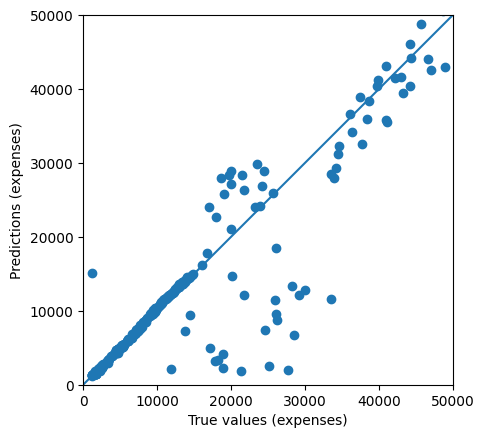

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
